# Linear Regression with sklearn

In [50]:
# Libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/salomekoller/Documents/KI-Anwendungen/projectX/data


Import the apartment data

In [51]:
dfmens1 = pd.read_csv('../backend/menstrual_cycle_data_enriched_per_CYCLE.csv', sep=',', encoding='utf-8')

print(dfmens1.shape)
dfmens1.head(5)

(1659, 14)


,ClientID,CycleNumber,LengthofCycle,CycleWithPeakorNot,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,Age,Height,Weight,BMI
0,nfp8122,1,29,1,17,12,12,5,9,5,36.0,160.02,54.43,21.25
1,nfp8122,2,27,1,15,12,13,2,6,5,36.0,160.02,54.43,21.25
2,nfp8122,3,29,1,15,14,11,1,5,5,36.0,160.02,54.43,21.25
3,nfp8122,4,27,1,15,12,13,2,6,5,36.0,160.02,54.43,21.25
4,nfp8122,5,28,1,16,12,12,4,8,5,36.0,160.02,54.43,21.25


Train 80% and Test 20% Samples

In [52]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(dfmens1[['LengthofCycle']], 
                                                    dfmens1['FirstDayofHigh'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
      LengthofCycle
266              31
148              30
566              30
743              30
1322             29 

y_train:
266      9
148     10
566     15
743      9
1322    18
Name: FirstDayofHigh, dtype: int64


Fit and predict Results

In [53]:
# use linear regression to fit (train) and then predict the results.
# This time use the train/test values from the cell above, which has multiple variables as X
# The function mean_squared_error(y_test, y_predicted) can be used to calculate the mean squared error
# calc the residuals and save the values in the variable "y_residuals"
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)

y_predict = lin_reg.predict(X_test)

y_residuals = y_predict - y_test

print('train mean_squared_error {}'.format(mean_squared_error(y_train, y_train_predict)))
print('train root_mean_squared_error {}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict))))

print('')

print("test mean_squared_error ", mean_squared_error(y_test, y_predict))
print("test root_mean_squared_error ", np.sqrt(mean_squared_error(y_test, y_predict)))

train mean_squared_error 7.255230058975245
train root_mean_squared_error 2.6935534260480605

test mean_squared_error  7.341089602265175
test root_mean_squared_error  2.709444519133982


Plot histogram of residuals

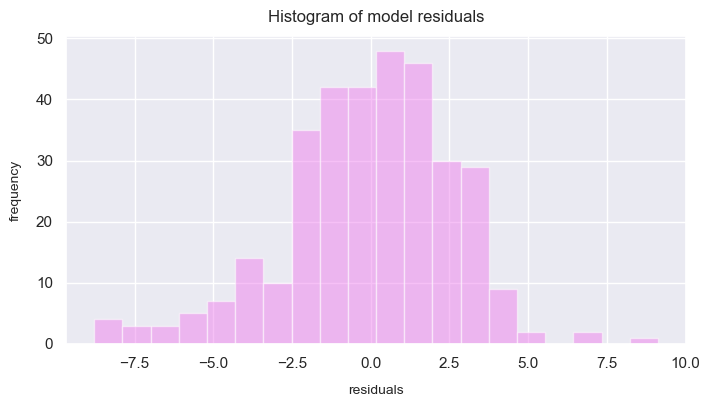

In [54]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=y_residuals, 
                            bins=20, 
                            color='violet',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

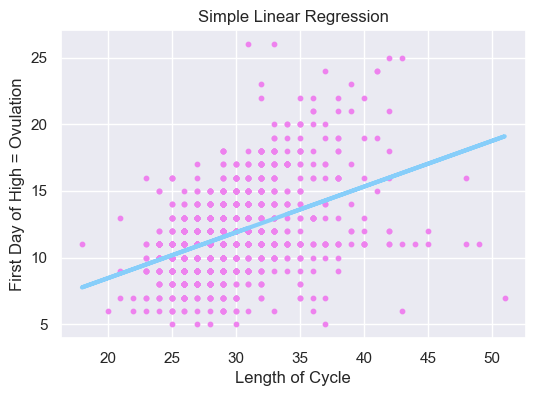

In [55]:
# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='violet')
plt.plot(X_train, y_train_predict, color="lightskyblue", linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel('Length of Cycle')
plt.ylabel('First Day of High = Ovulation')

plt.show()

Train 80% Test 20% with multiple values

In [56]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X_train, X_test, y_train, y_test = train_test_split(dfmens1[['LengthofCycle',
                                                        'LengthofLutealPhase', 
                                                        'LengthofMenses',
                                                        'Age',
                                                        'Weight']], 
                                                        dfmens1['FirstDayofHigh'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
      LengthofCycle  LengthofLutealPhase  LengthofMenses   Age  Weight
266              31                   16               6  32.0   54.43
148              30                   15               5  24.0   58.97
566              30                   12               5  23.0   63.50
743              30                   15               7  30.0   97.07
1322             29                    8               6  33.0   59.87 

y_train:
266      9
148     10
566     15
743      9
1322    18
Name: FirstDayofHigh, dtype: int64


In [57]:
# use linear regression to fit (train) and then predict the results.
# This time use the train/test values from the cell above, which has multiple variables as X
# The function mean_squared_error(y_test, y_predicted) can be used to calculate the mean squared error
# calc the residuals and save the values in the variable "y_residuals"
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)

y_predict = lin_reg.predict(X_test)

y_residuals = y_predict - y_test

# Testdaten:
print('train mean_squared_error {}'.format(mean_squared_error(y_train, y_train_predict)))
print('train root_mean_squared_error {}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict))))

print('')

#Trainingdaten:
print("test mean_squared_error ", mean_squared_error(y_test, y_predict))
print("test root_mean_squared_error ", np.sqrt(mean_squared_error(y_test, y_predict)))

train mean_squared_error 5.973738183337952
train root_mean_squared_error 2.444123193159042

test mean_squared_error  6.247456967780568
test root_mean_squared_error  2.499491341809483


Interpretation: 
- Vergleich der Test- und Trainingsdaten -> Gibt es einen grossen Unterschied? Nein! Das Model wurde also gut gefitted.
- Der Root Mean Squared Error ist nahe zu 0. Das Modell konnte also gute Predictions machen.

Plot historgram of residuals

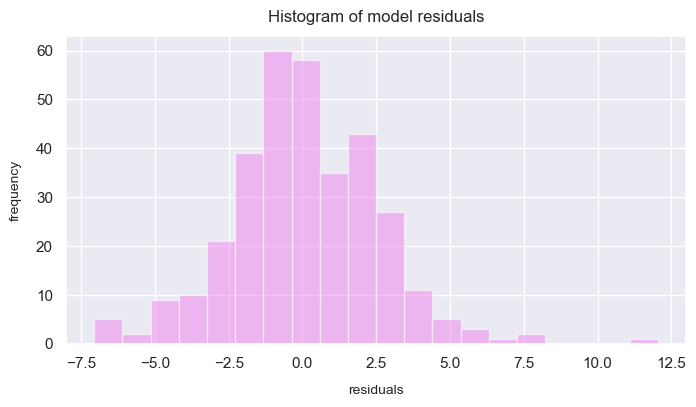

In [58]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=y_residuals, 
                            bins=20, 
                            color='violet',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

Export

In [59]:
import pickle

# save model to file
model_filename = "linear_regression.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(lin_reg, file=f)